In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import random

# Part 1 Single Layer Perceptron 

In [19]:
n = 100 
mA = np.array([1.0, 0.5])
sigmaA = 0.4
mB = np.array([-1.0, 1.0])
sigmaB = 0.4 

classA = np.vstack((np.random.randn(1, 100) * sigmaA + mA[0], np.random.randn(1, 100) * sigmaA + mA[1], np.ones((1, 100))))
classB = np.vstack((np.random.randn(1, 100) * sigmaB + mB[0], np.random.randn(1, 100) * sigmaB + mB[1], np.ones((1, 100))))

print(classA.shape)
#classA

(3, 100)


[(-2.0, 2.0), (-2.0, 2.0)]

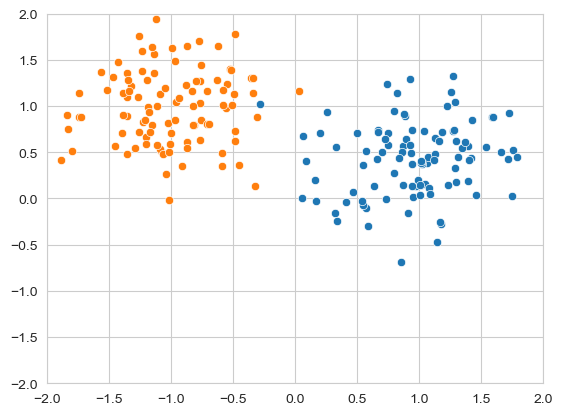

In [20]:
#matplotlib.pyplot.scatter(x=classA[0], y=classA[1], color="blue")
#matplotlib.pyplot.scatter(x=classB[0], y=classB[1], color="red")
sns.set_style("whitegrid")
sns.scatterplot(x=classA[0], y=classA[1])
splt = sns.scatterplot(x=classB[0], y=classB[1])
splt.set(xlim=(-2,2),ylim=(-2,2))

## Analysis 

Lower sigma values lead to clustered data, which lead to increasing linear separatability.

mA\[0\] affects translation of data in the x axis 

mA\[1\] affects translation of data in the y axis 



In [21]:
# Random initialization of weights 
W = np.random.randn(1,3)

dataset = np.hstack((classA, classB))
label = np.hstack((np.ones((1,100)), np.full((1, 100), -1)))
dataset.shape 
#np.dot(W, classA)

(3, 200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


weights [[0.09554512 0.93348821 0.30132994]]


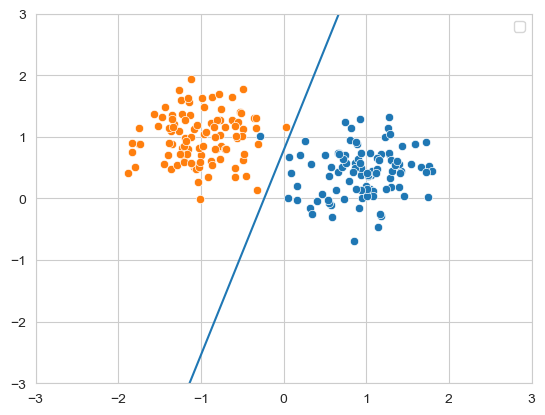

In [31]:
class NN:
    def __init__(self, dim:int, learning_rate: float, x: np.ndarray, label: np.ndarray):
        self.weights = np.random.randn(1, dim+1)
        print("weights", self.weights)
        self.dim = dim
        self.lr = learning_rate
        self.x = x
        self.label = label
    
    def batch_error(self) -> np.ndarray:
        return -1 * self.lr * np.dot(np.dot(self.weights, self.x) - self.label, np.transpose(self.x))
    
    def sequential_error(self, index) -> np.ndarray:
        return -1 * self.lr * (np.dot(self.weights, self.x[:, index]) - self.label[:, index])
    
    @staticmethod
    def threshold(weights, x_1):
        return (-weights[0][0] * x_1 - weights[0][2]) / weights[0][1]
    
    
    def display_graph(self):        
        sns.set_style("whitegrid")
        sns.scatterplot(x=classA[0], y=classA[1])
        splt = sns.scatterplot(x=classB[0], y=classB[1])
        plt.ylim(-3, 3)
        plt.xlim(-3, 3)
        
        xlim = splt.get_xlim()
        ylim = [self.threshold(self.weights, x1) for x1 in xlim]
        sns.lineplot(x=xlim, y=ylim)
        splt.legend()
        
        #return splt
    
    
    def train_batch(self, epoch: int) -> None:
        
        for i in range(epoch):
            #Update weights
            train_loss = self.batch_error()
            self.weights = self.weights + train_loss
        
        self.display_graph()
        
    
    def train_sequential(self, epoch: int) -> None:
        
        indexes = [i for i in range(self.x.shape[1])]
        for i in range(epoch):
            random.shuffle(indexes)
            for index in indexes:
                train_loss = self.sequential_error(index)
                self.weights += train_loss
        
        self.display_graph()
        
            
t = NN(2, 0.001, dataset, label)
t.train_batch(100)
#t.train_sequential(5)
#t.batch_error()